In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('/content/ACV1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
def resize_image(image, method):
    height, width = image.shape[:2]
    if method == 'linear':
        return cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_LINEAR)
    elif method == 'nearest':
        return cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_NEAREST)
    elif method == 'polynomial':
        return cv2.resize(image, (width // 2, height // 2), interpolation=cv2.INTER_CUBIC)

In [4]:
resized_linear = resize_image(image, 'linear')
resized_nearest = resize_image(image, 'nearest')
resized_polynomial = resize_image(image, 'polynomial')


In [5]:
def blur_image(image, method):
    if method == 'box':
        return cv2.blur(image, (5, 5))
    elif method == 'gaussian':
        return cv2.GaussianBlur(image, (5, 5), 0)
    elif method == 'adaptive':
        return cv2.medianBlur(image, 5)

In [6]:
blurred_box = blur_image(image, 'box')
blurred_gaussian = blur_image(image, 'gaussian')
blurred_adaptive = blur_image(image, 'adaptive')

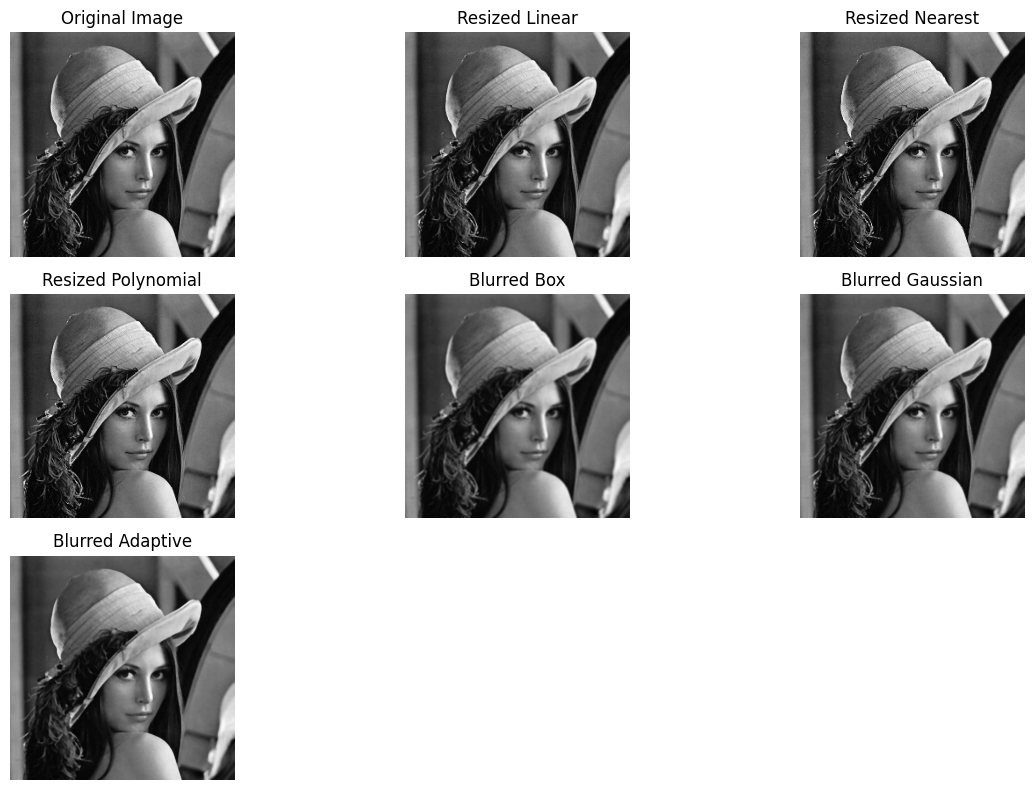

In [7]:
plt.figure(figsize=(12, 8))
titles = [
    'Original Image', 'Resized Linear', 'Resized Nearest', 'Resized Polynomial',
    'Blurred Box', 'Blurred Gaussian', 'Blurred Adaptive'
]
images = [image, resized_linear, resized_nearest, resized_polynomial, blurred_box, blurred_gaussian, blurred_adaptive]

for i in range(len(images)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Load the MNIST dataset
(X, y), (X_test, y_test) = mnist.load_data(path="mnist.npz")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [10]:

# Flatten the images for compatibility with classifiers
X = X.reshape(X.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


In [11]:
# Normalize the data to [0, 1] range
X = X / 255.0
X_test = X_test / 255.0


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [14]:
# Naive Bayes Model with Cross Validation
nb_model = GaussianNB()
nb_cv_scores = cross_val_score(nb_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {nb_cv_scores.mean():.2f} ± {nb_cv_scores.std():.2f}")


Naive Bayes Cross-Validation Accuracy: 0.56 ± 0.01


In [16]:

# Random Forest Model with Cross Validation
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")


KeyboardInterrupt: 

In [17]:
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)


In [18]:
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

KeyboardInterrupt: 

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"F-Measure: {f1_score(y_true, y_pred, average='weighted'):.2f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print()


In [ ]:
evaluate_model(y_val, y_pred_nb, "Naive Bayes")
evaluate_model(y_val, y_pred_rf, "Random Forest")

# ROC and AUC for Random Forest
y_proba_rf = rf_model.predict_proba(X_val)
roc_auc = roc_auc_score(y_val, y_proba_rf, multi_class="ovr")
print(f"ROC AUC for Random Forest: {roc_auc:.2f}")


In [ ]:
# Plot ROC Curve for Random Forest (For class 0)
fpr, tpr, _ = roc_curve(y_val, y_proba_rf[:, 0], pos_label=0)
plt.figure()
plt.plot(fpr, tpr, label="Random Forest (AUC = %.2f)" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()